In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,1,79,671.000000
1,flat,pivotal devaan,sector 84,0.41,7033.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2,2,2,10.0,East,New Property,583.0,565.0,483.0,0,0,0,0,0,1,23,291.500000
2,house,dlf city plots,sector 26,17.30,38737.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,3.0,North,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,124,744.333333
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,3,9,3+,3.0,East,Relatively New,NaN,165.0,164.0,0,0,0,1,1,1,41,498.000000
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,13.0,NaN,Undefined,NaN,2360.0,NaN,0,0,0,0,0,2,0,590.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area
    built_up_area -> will fix through super_built_up_area
    agePossession for undefined categorires

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

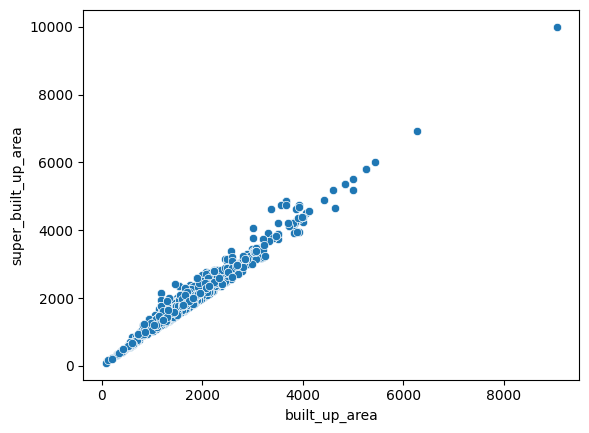

In [31]:
sns.scatterplot(data=df, x='built_up_area', y='super_built_up_area')

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

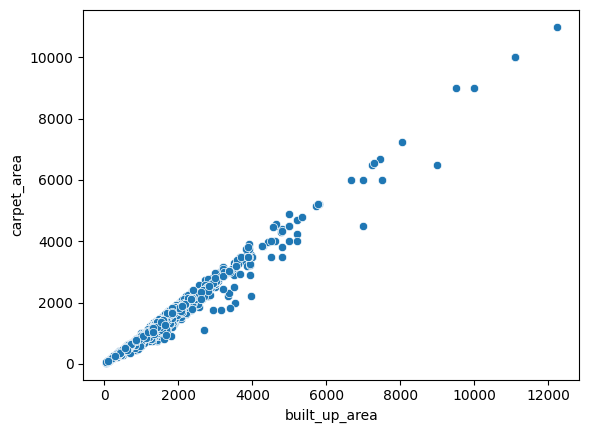

In [32]:
sns.scatterplot(data=df, x='built_up_area', y='carpet_area')

In [7]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [8]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [9]:
all_present_df.shape

(531, 24)

In [10]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [11]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [12]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [13]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [14]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
6,flat,dlf new town heights,sector 90,1.95,7151.0,2727.0,Super Built up area 2727(253.35 sq.m.)Carpet a...,4,4,3+,24.0,North-East,Relatively New,2727.0,NaN,2200.0,0,1,1,0,0,2,174,681.750000
14,flat,bestech park view sanskruti,sector 92,1.60,7547.0,2120.0,Super Built up area 2120(196.95 sq.m.)Carpet a...,3,3,3,10.0,East,Relatively New,2120.0,NaN,1450.0,0,1,0,0,0,1,60,706.666667
29,flat,bestech park view ananda,sector 81,0.95,10626.0,894.0,Super Built up area 1360(126.35 sq.m.)Carpet a...,2,2,2,2.0,North-East,Relatively New,1360.0,NaN,894.0,0,0,0,0,0,1,104,447.000000
32,flat,ireo skyon,sector 60,3.60,12816.0,2809.0,Super Built up area 2809(260.96 sq.m.)Carpet a...,4,5,3,24.0,North-East,Relatively New,2809.0,NaN,2400.0,0,1,0,0,0,1,49,702.250000
48,flat,supertech araville,sector 79,0.71,6063.0,1171.0,Super Built up area 1295(120.31 sq.m.)Carpet a...,2,2,3+,17.0,North,New Property,1295.0,NaN,1250.0,0,0,0,0,1,2,53,585.500000


In [16]:
# taking the avarage (used the above 2 ratios found)
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_21880\792634595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21880\792634595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [19]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,1,79,671.000000
7,flat,godrej aria,sector 79,1.30,8844.0,1470.0,Super Built up area 1470(136.57 sq.m.),2,2,2,7.0,NaN,Relatively New,1470.0,NaN,NaN,1,0,0,0,0,1,116,735.000000
10,flat,the close north,sector 50,2.50,11945.0,2093.0,Super Built up area 2093(194.45 sq.m.),3,3,3,11.0,North-East,Relatively New,2093.0,NaN,NaN,0,0,0,1,0,1,127,697.666667
15,flat,ats triumph,sector 104,1.73,7555.0,2290.0,Super Built up area 2290(212.75 sq.m.),3,4,3+,15.0,North-East,Relatively New,2290.0,NaN,NaN,0,1,0,0,0,2,159,763.333333
16,flat,assotech blith,sector 99,1.15,6594.0,1744.0,Super Built up area 1365(126.81 sq.m.),2,2,2,2.0,NaN,New Property,1365.0,NaN,NaN,0,0,0,0,1,1,72,872.000000


In [21]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_21880\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21880\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round

In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
12,flat,bestech park view residency,sector 2,0.56,8550.0,655.0,Carpet area: 650 (60.39 sq.m.),1,1,2,7.0,South-West,Moderately Old,NaN,NaN,650.0,0,0,0,0,0,2,92,655.000000
13,flat,godrej nature plus serenity,sector 33,1.39,11583.0,1200.0,Carpet area: 1200 (111.48 sq.m.),3,2,3+,23.0,East,Under Construction,NaN,NaN,1200.0,0,0,0,0,0,2,105,400.000000
20,flat,suposhaa smartworld orchard,sector 61,2.17,14000.0,1550.0,Carpet area: 1549 (143.91 sq.m.),3,3,3,1.0,NaN,Under Construction,NaN,NaN,1549.0,0,0,0,0,0,2,0,516.666667
27,flat,m3m latitude,sector 65,4.60,26791.0,1717.0,Carpet area: 1717 (159.51 sq.m.),3,3,3,7.0,South,New Property,NaN,NaN,1717.0,1,1,1,1,0,2,115,572.333333
61,flat,the crew bos chs manesar,manesar,0.85,3696.0,2300.0,Carpet area: 2300 (213.68 sq.m.),3,3,2,2.0,East,Moderately Old,NaN,NaN,2300.0,0,0,0,0,0,2,44,766.666667


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_21880\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21880\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet

In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

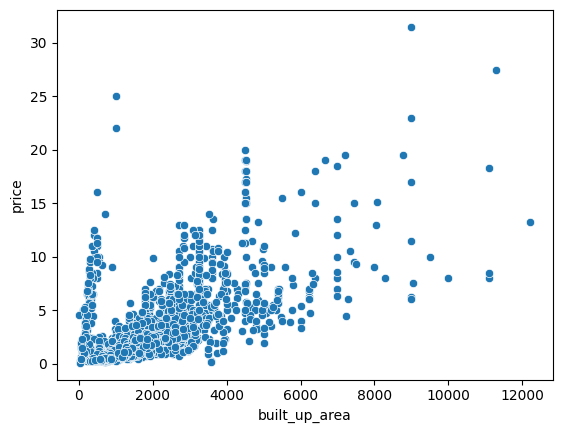

In [30]:
sns.scatterplot(data=df, x='built_up_area', y='price')

In [33]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]
# The price is justified by the actual area but not by the built_up_area

In [35]:
anamoly_df.sample(5) 

,price,area,built_up_area
691,5.80,1935.0,1935.0
637,2.75,1557.0,1557.0
3081,3.35,1242.0,1242.0
1022,5.15,1935.0,1935.0
618,2.80,2350.0,1798.0


In [36]:
#anamoly_df['built_up_area'] = anamoly_df['area'] 

In [37]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

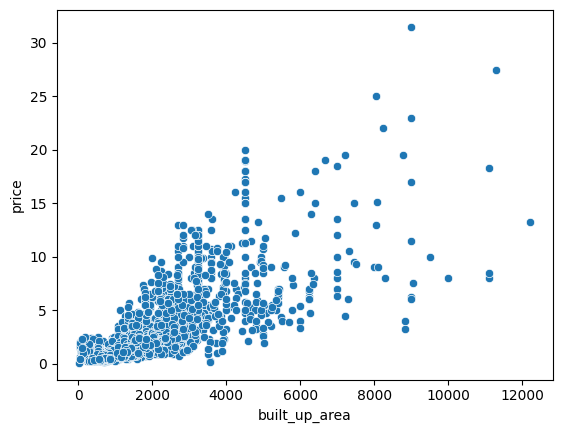

In [38]:
sns.scatterplot(data=df, x='built_up_area', y='price')

In [39]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [40]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,2,2,2,16.0,NaN,New Property,1214.0,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7033.0,2,2,2,10.0,East,New Property,565.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38737.0,6,7,3+,3.0,North,New Property,4518.0,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,3,9,3+,3.0,East,Relatively New,1494.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,4,5,0,13.0,NaN,Undefined,2360.0,0,0,0,0,0,2,0


In [41]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [42]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
447,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,2,0
805,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,2,0
815,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130
819,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,2,21
1121,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,2,9
1286,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114
1312,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,2,88
1501,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,2,9
1531,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,2,0
1564,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,2,0


In [43]:
# just replacing the median values for houses to fill the floorNum
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [44]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_21880\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [45]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### facing

<Axes: ylabel='count'>

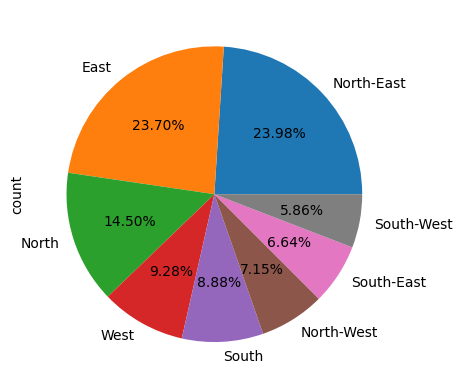

In [46]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [47]:
df.drop(columns=['facing'],inplace=True) # not useful

In [48]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
692,flat,the close north,sector 50,2.70,10365.0,3,3,3+,6.0,Moderately Old,2400.0,0,1,0,0,0,2,174
806,flat,dlf the primus,sector 82a,1.59,10338.0,3,3,3+,5.0,Relatively New,1668.0,0,0,0,0,1,0,167
37,flat,ats triumph,sector 104,1.85,8079.0,3,3,3+,24.0,Relatively New,2072.0,0,1,0,0,0,2,174
439,flat,sobha city,sector 108,4.10,23402.0,4,5,3,25.0,New Property,2343.0,1,1,0,0,0,0,97
2762,flat,mapsko paradise,sector 83,0.75,5597.0,3,3,3,10.0,New Property,1162.0,0,0,0,0,1,1,49


In [49]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [50]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1564,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,2,0


In [51]:
df.drop(index=[1564],inplace=True) # just 1 row so dropping -> could have taken th mode for that particular sector

In [52]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [53]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [54]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,house,independent,sector 92,1.80,7627.0,4,5,0,13.0,Undefined,2360.0,0,0,0,0,0,2,0
23,flat,global hill view,sector 11,0.36,5150.0,2,2,0,15.0,Undefined,699.0,0,0,0,0,0,2,0
40,house,ats tourmaline,sector 109,1.87,8698.0,3,4,0,12.0,Undefined,2150.0,0,0,0,0,0,2,0
46,house,independent,sector 38,8.00,25616.0,10,10,3+,1.0,Undefined,3123.0,0,0,0,0,0,2,0
50,flat,elan the presidential,sector 106,3.90,15918.0,3,3,0,20.0,Undefined,2450.0,0,0,0,0,0,2,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,flat,sare green parc,sector 92,0.85,6741.0,3,2,2,14.0,Undefined,1261.0,0,0,0,0,0,2,0
3457,flat,unitech sunbreeze,sector 69,1.00,5476.0,4,3,0,0.0,Undefined,1826.0,0,0,0,0,0,2,0
3466,flat,m3m soulitude,sector 89,1.25,8784.0,3,3,0,4.0,Undefined,1423.0,0,0,0,0,0,2,61
3472,house,independent,sector 105,1.15,3285.0,3,2,1,1.0,Undefined,3889.0,0,0,0,0,0,2,0


In [55]:
# by asking the sector and property_type we can get the mode(most frequent) of the agePossession from the rest of the data
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [56]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           597
Moderately Old         584
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [58]:
# For the rest of the undefinied values we can take the mode of the sector and replace the values
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [59]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [60]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           598
Moderately Old         591
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [61]:
# replacing the rest of the undefined values with the mode of the property_type
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [62]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [63]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         622
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [64]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [65]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [66]:
df.shape

(3554, 18)